In [1]:
library(tidyverse)
library(scales)
library(knitr)
library(lubridate)
library(RcppRoll)

── Attaching packages ─────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
options(repr.plot.width=10, repr.plot.height=8)

In [3]:
breakup <- read_csv("../data/NenanaIceClassic_1917-2021.csv")

Rows: 105 Columns: 5

── Column specification ────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Month
dbl  (3): Year, Decimal Day, Day
time (1): Time


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [4]:
breakup <- breakup |>
    select(Year, Month, Day, Time, "Decimal Day")

In [5]:
kable(tail(breakup))



| Year|Month | Day|Time     | Decimal Day|
|----:|:-----|---:|:--------|-----------:|
| 2016|April |  23|15:39:00 |    114.6521|
| 2017|May   |   1|12:00:00 |    121.5000|
| 2018|May   |   1|13:18:00 |    121.5542|
| 2019|April |  14|00:21:00 |    104.0146|
| 2020|April |  27|12:56:00 |    118.5389|
| 2021|April |  30|12:50:00 |    120.5347|

In [6]:
breakup <- breakup |> 
    rename(Decimal_Day = "Decimal Day")

In [7]:
mean_breakup_date <- mean(breakup$Decimal_Day)

In [8]:
breakup_1980 <- breakup |>
    filter(Year >= 1980)

mean_breakup_date_1980 <- mean(breakup_1980$Decimal_Day)

In [9]:
breakup$rollavg_9yr <- roll_mean(breakup$Decimal_Day, n = 9, align = "right", fill = NA)

In [10]:
date_labels <- as.Date("1916-01-01")
yday(date_labels) <- seq(100, 150, 5)
date_labels <- date_labels |> strftime(format = "%b-%d")

In [11]:
x <- as.Date("1917-01-01")
factor <- 1

In [58]:
time_series_plot <- breakup |> ggplot() +
    geom_line(aes(x = Year, y = Decimal_Day)) +
    geom_line(aes(x = Year, y = rollavg_9yr),
              size = 1,
              color = '#2f873c') +
    geom_hline(yintercept = mean_breakup_date, size = 1) +
    scale_x_continuous(breaks = seq(1915, 2025, 10)) +
    scale_y_continuous(name = "Decimal Day of the Year",
                       breaks = seq(100, 150, 5),
                       sec.axis = sec_axis(~., breaks = seq(100, 150, 5),
                                           labels = date_labels)) +
    expand_limits(y = c(100, 150)) +
    labs(title = "Tenana River Breakup Dates") +
    theme_linedraw() +
    theme(aspect.ratio=4/6,
          plot.title = element_text(hjust = 0.5))

Warning message:
“Removed 8 row(s) containing missing values (geom_path).”


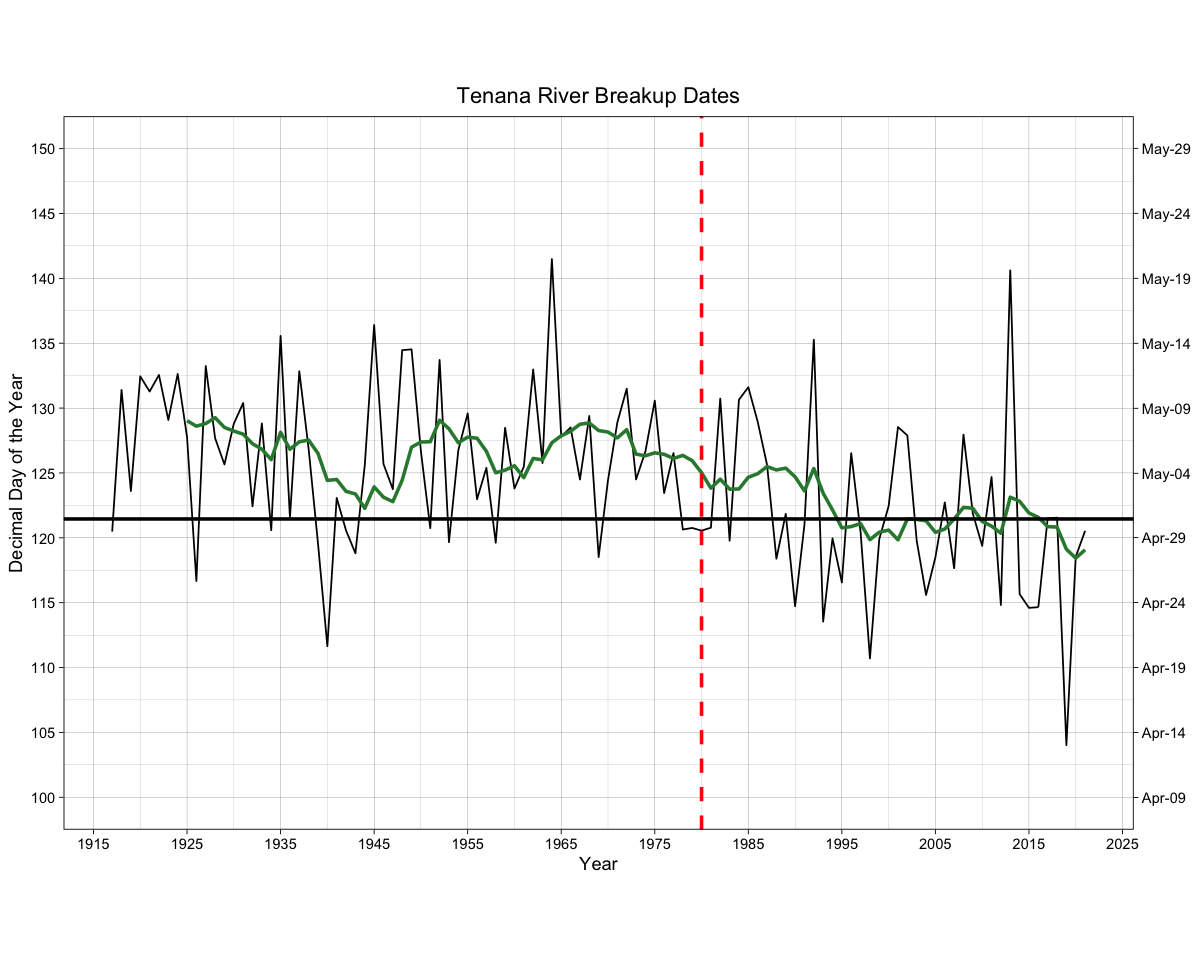

In [13]:
time_series_plot_1980 <- breakup |> ggplot() +
    geom_line(aes(x = Year, y = Decimal_Day)) +
    geom_line(aes(x = Year, y = rollavg_9yr),
              size = 1,
              color = '#2f873c') +
    geom_hline(yintercept = mean_breakup_date_1980, size = 1) +
    geom_vline(xintercept = 1980,
               size = 1,
               color = "red",
               linetype = "dashed") +
    scale_x_continuous(breaks = seq(1915, 2025, 10)) +
    scale_y_continuous(name = "Decimal Day of the Year",
                       breaks = seq(100, 150, 5),
                       sec.axis = sec_axis(~., breaks = seq(100, 150, 5),
                                           labels = date_labels)) +
    expand_limits(y = c(100, 150)) +
    labs(title = "Tenana River Breakup Dates") + 
    theme_linedraw() +
    theme(aspect.ratio=4/6,
          plot.title = element_text(hjust = 0.5))

time_series_plot_1980

In [59]:
day_dist <- ggplot(breakup, aes(x = Decimal_Day)) +
    geom_histogram(binwidth = 2, colour="black", fill="grey") +
    geom_density(aes(y=..density..* (nrow(breakup) * 2)),
                 alpha=.2, fill="#2f873c", color="#2f873c") +
    scale_y_continuous(name ="Count", breaks=seq(0, 20, 2)) +
    expand_limits(y = c(0, 20)) +
    labs(title = "Day of Breakup Distribution and Density Plot",
         x = "Day of the Year") +
    theme_linedraw() +
    theme(aspect.ratio=4/6,
          plot.title = element_text(hjust = 0.5))

In [60]:
time_dist <- breakup |>
    ggplot(aes(x = Time)) +
    geom_histogram(colour="black", fill="grey") +
    geom_density(aes(y=..density..* (nrow(breakup) * (2880))),
                 alpha=.2, fill="#2f873c", color="#2f873c") +
    scale_y_continuous(name ="Count", breaks=seq(0, 10, 2)) +
    expand_limits(y = c(0, 10)) + 
    scale_x_time(labels = label_time(format = '%H:%M')) +
    labs(title = "Time of Breakup Distribution and Density Plot") +
    theme_linedraw() +
    theme(aspect.ratio=4/6,
          plot.title = element_text(hjust = 0.5))

In [57]:
breakup_1980 <- breakup |>
    filter(Year >= 1980)

In [26]:
data <- c(breakup_1980$Decimal_Day)
type <- rep('short', length(data))

short <- tibble(type, data)

In [27]:
data <- c(breakup$Decimal_Day)
type <- rep('full', length(data))

full <- tibble(type, data)

In [42]:
short_mean <- mean(short$data)
full_mean <- mean(full$data)

In [28]:
complete <- rbind(short, full)

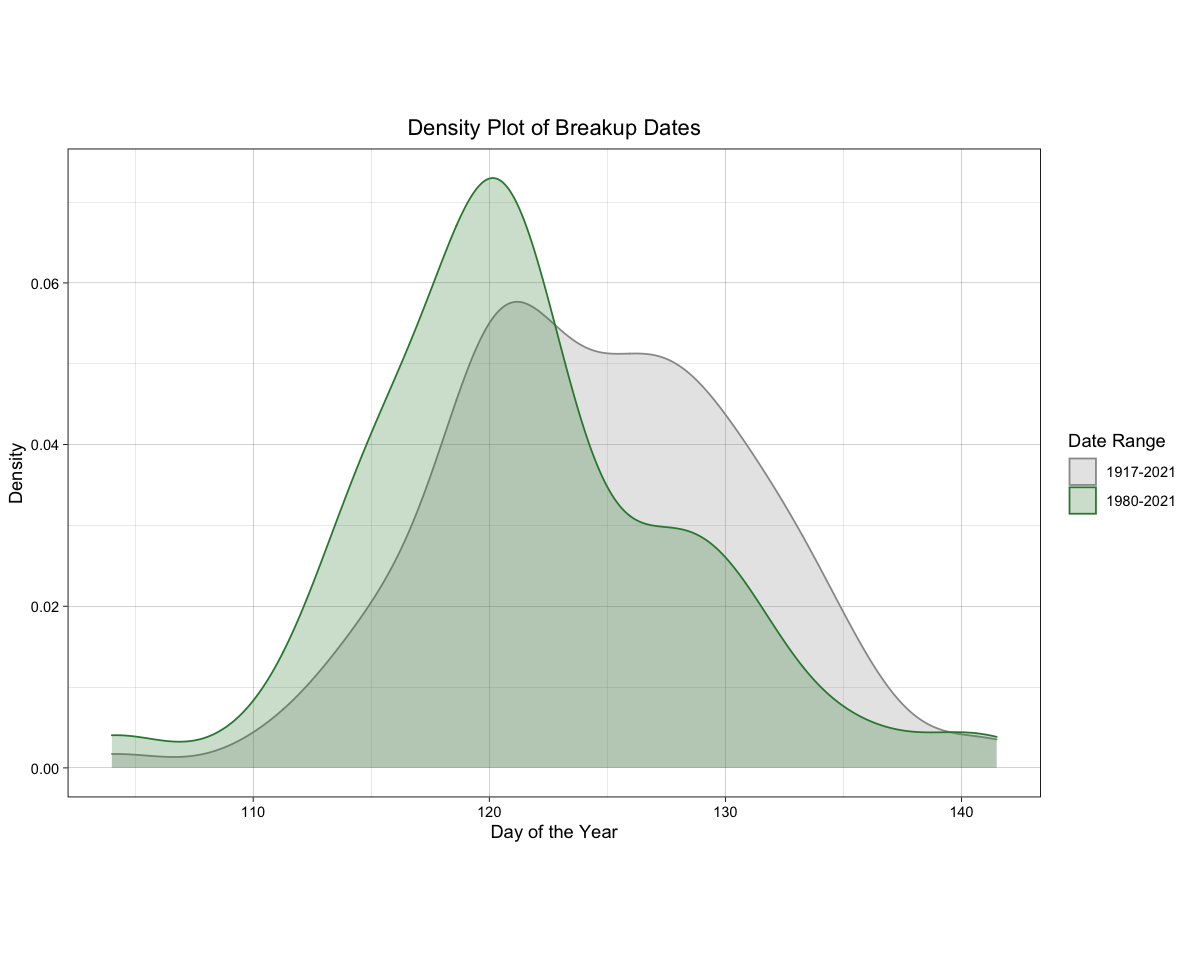

In [52]:
density_plot <- complete |>
    ggplot(aes(x=data, fill=type, color=type)) +
    geom_density(alpha = 0.25) +
    scale_fill_manual(name = "Date Range", labels = c("1917-2021", '1980-2021'), values=c("#999999", "#2f873c")) +
    scale_color_manual(name = "Date Range", labels = c("1917-2021", '1980-2021'), values=c("#999999", "#2f873c")) +
    labs(title = "Density Plot of Breakup Dates", x="Day of the Year", y='Density') +
    theme_linedraw() +
    theme(aspect.ratio=4/6,
          plot.title = element_text(hjust = 0.5))

density_plot

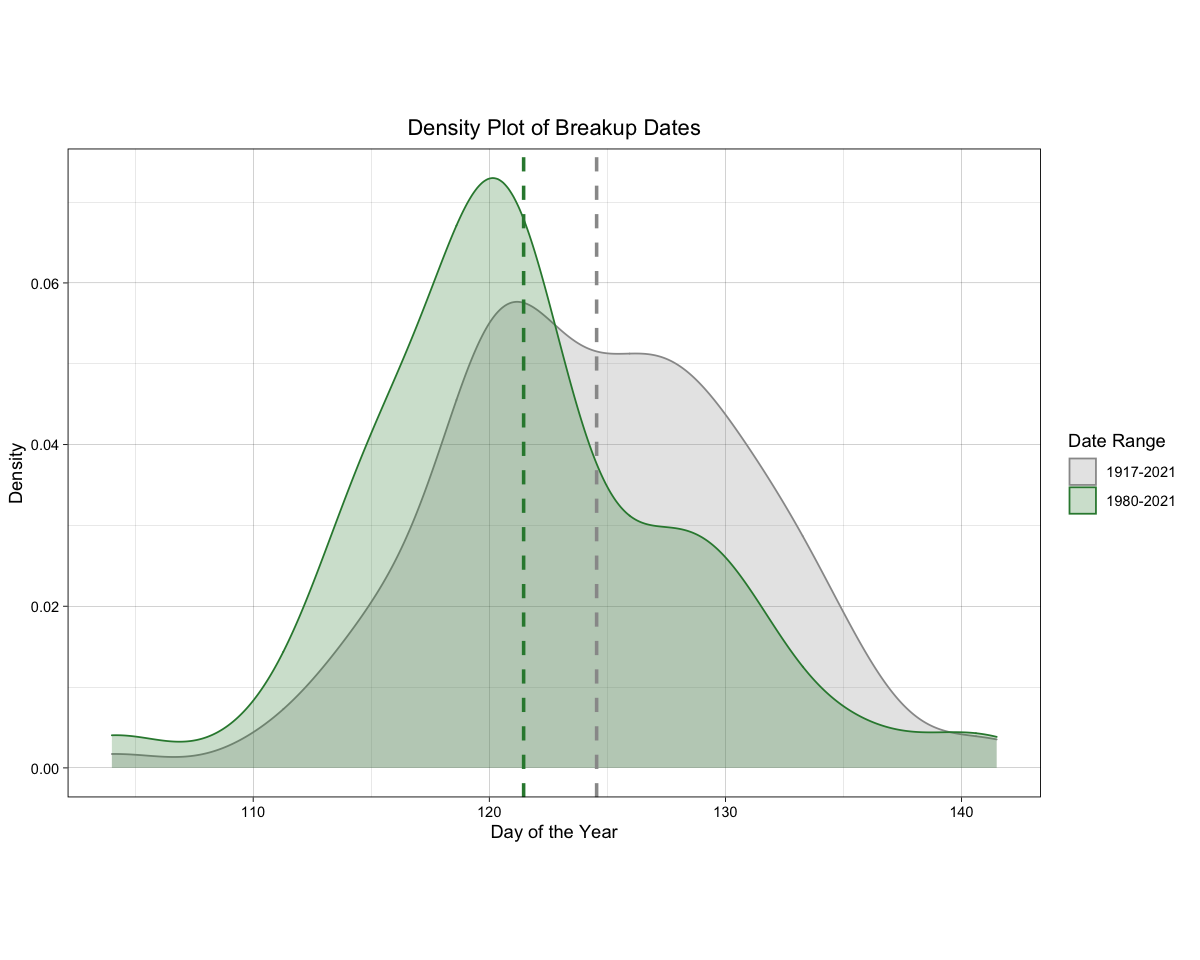

In [51]:
density_mean_plot <- complete |>
    ggplot(aes(x=data, fill=type, color=type)) +
    geom_density(alpha = 0.25) +
    scale_fill_manual(name = "Date Range", labels = c("1917-2021", '1980-2021'), values=c("#999999", "#2f873c")) +
    scale_color_manual(name = "Date Range", labels = c("1917-2021", '1980-2021'), values=c("#999999", "#2f873c")) +
    geom_vline(xintercept = short_mean,
               size = 1,
               color = "#2f873c",
               linetype = "dashed") +
    geom_vline(xintercept = full_mean,
               size = 1,
               color = "#999999",
               linetype = "dashed") +
    labs(title = "Density Plot of Breakup Dates", x="Day of the Year", y='Density') +
    theme_linedraw() +
    theme(aspect.ratio=4/6,
          plot.title = element_text(hjust = 0.5))

density_mean_plot

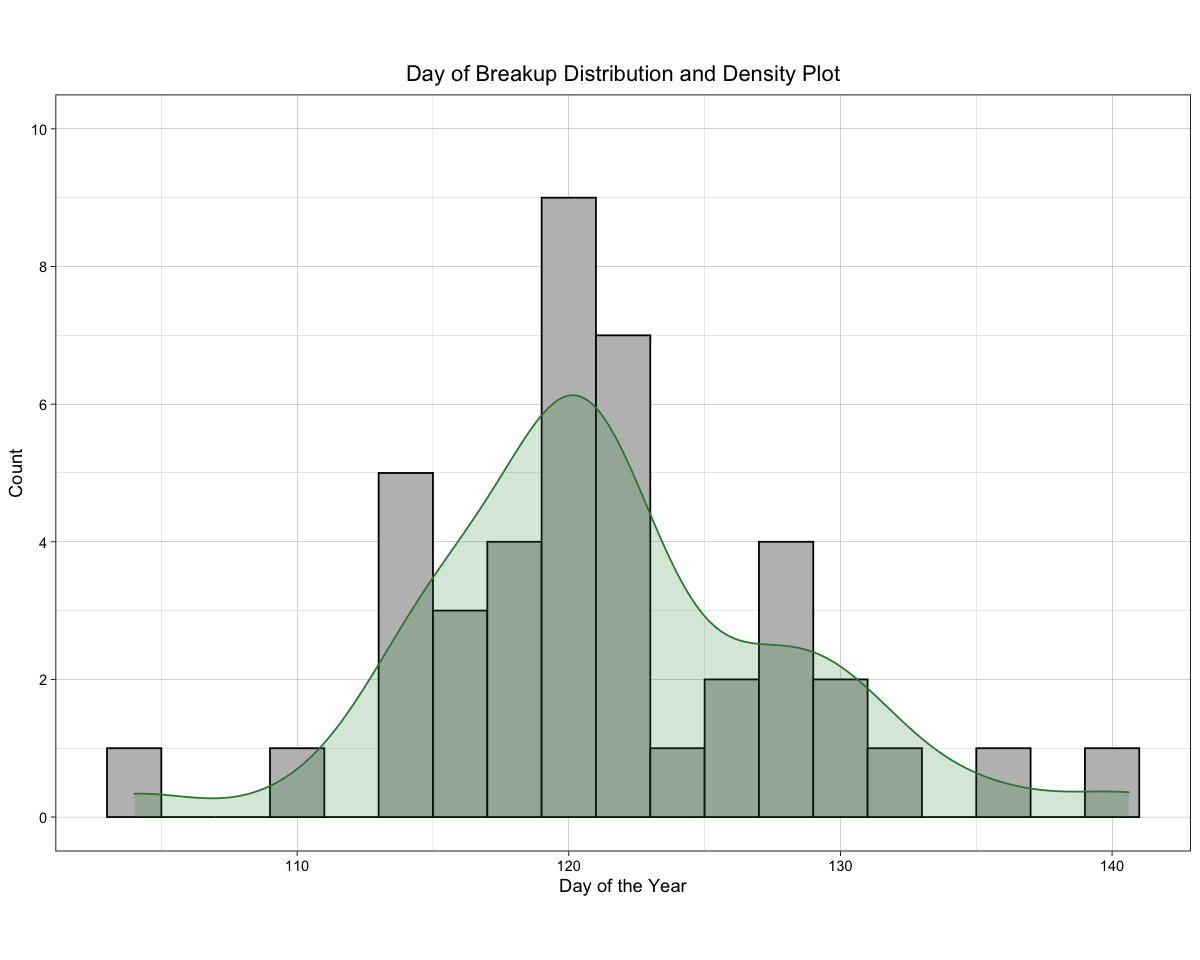

In [55]:
day_dist <- ggplot(breakup_1980, aes(x = Decimal_Day)) +
    geom_histogram(binwidth = 2, colour="black", fill="grey") +
    geom_density(aes(y=..density..* (nrow(breakup_1980) * 2)),
                 alpha=.2, fill="#2f873c", color="#2f873c") +
    scale_y_continuous(name ="Count", breaks=seq(0, 10, 2)) +
    expand_limits(y = c(0, 10)) +
    labs(title = "Day of Breakup Distribution and Density Plot",
         x = "Day of the Year") +
    theme_linedraw() +
    theme(aspect.ratio=4/6,
          plot.title = element_text(hjust = 0.5))

day_dist

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



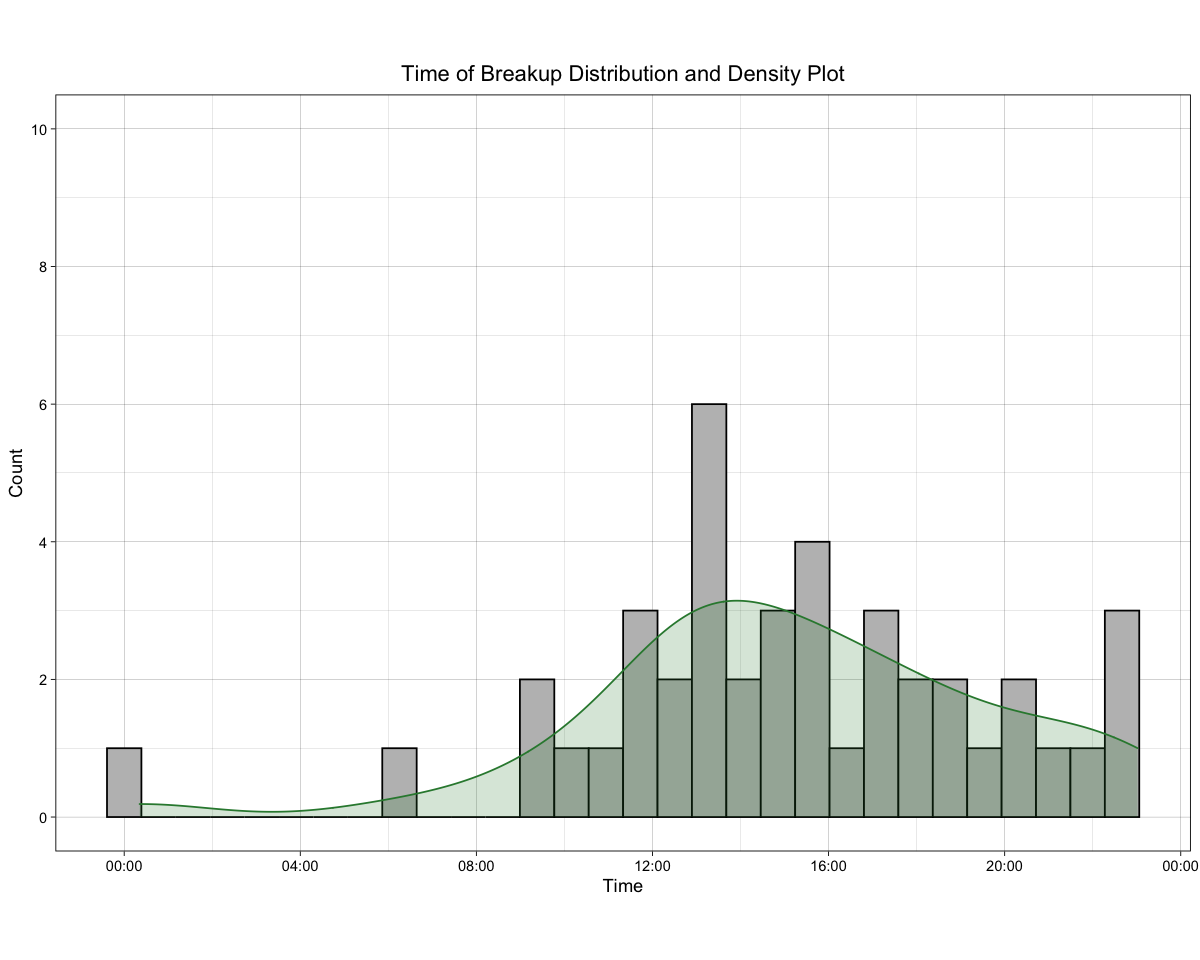

In [56]:
time_dist <- breakup_1980 |>
    ggplot(aes(x = Time)) +
    geom_histogram(colour="black", fill="grey") +
    geom_density(aes(y=..density..* (nrow(breakup_1980) * (2880))),
                 alpha=.2, fill="#2f873c", color="#2f873c") +
    scale_y_continuous(name ="Count", breaks=seq(0, 10, 2)) +
    expand_limits(y = c(0, 10)) + 
    scale_x_time(labels = label_time(format = '%H:%M')) +
    labs(title = "Time of Breakup Distribution and Density Plot") +
    theme_linedraw() +
    theme(aspect.ratio=4/6,
          plot.title = element_text(hjust = 0.5))

time_dist

In [67]:
date <- as.Date("2016-05-01")
yday(date)

[1] 122